In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Problem : Principal Component Analysis
**Principal component analysis** (PCA) is a technique of dimensionality reduction, which linearly maps data onto a lower-dimensional space, so that the variance of the projected data in the associated dimensions would be maximized. In this problem, you will perform PCA on a dataset of face images.

In [3]:
X_train, X_test = [],[]
Y_train, Y_test = [],[]

for i in range(1,41):
  for j in range(1,10):
    img = cv2.imread('data/{}_{}.png'.format(i,j), cv2.IMREAD_GRAYSCALE)
    X_train.append(img)
    Y_train.append(i)
  img = cv2.imread('data/{}_10.png'.format(i,j), cv2.IMREAD_GRAYSCALE)
  X_test.append(img)
  Y_test.append(i)

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(360, 56, 46) (360,)
(40, 56, 46) (40,)


In [6]:
print(X_train)
x = X_train.reshape(len(Y_train),-1)
print(x)
print(x.shape)

[[[ 88  88  90 ...  87  85  86]
  [ 87  90  90 ...  87  87  87]
  [ 90  89  90 ...  91  88  87]
  ...
  [ 78  70 117 ...  85  73  73]
  [ 94 114 170 ... 119 102  83]
  [187 199 201 ... 138 142 134]]

 [[ 87  90  95 ... 138 138 133]
  [ 89  90  91 ... 136 133 131]
  [ 91  90  90 ... 142 133 126]
  ...
  [198 210 125 ...  76  73  73]
  [203 211 129 ... 102  80  73]
  [204 212 152 ... 124 120  88]]

 [[ 92  92  88 ... 145 149 142]
  [ 93  93  90 ... 145 140 144]
  [ 90  88  83 ... 142 141 135]
  ...
  [ 75  76  77 ... 165 153 129]
  [ 75  78  77 ... 169 150 139]
  [ 76  77  75 ... 165 146 151]]

 ...

 [[128 128 128 ... 124 124 123]
  [128 128 128 ... 124 123 125]
  [128 129 127 ... 124 125 125]
  ...
  [ 71  70  68 ...  92  92  93]
  [ 71  70  67 ...  92  91  93]
  [ 71  69  69 ...  91  92  93]]

 [[122 123 124 ... 121 121 119]
  [123 124 123 ... 121 119 120]
  [123 123 123 ... 120 120 119]
  ...
  [ 88  89  91 ...  40  40  42]
  [ 87  88  89 ...  39  40  40]
  [ 87  90  88 ...  38  40  

## 1. mean face & first four eigenfaces

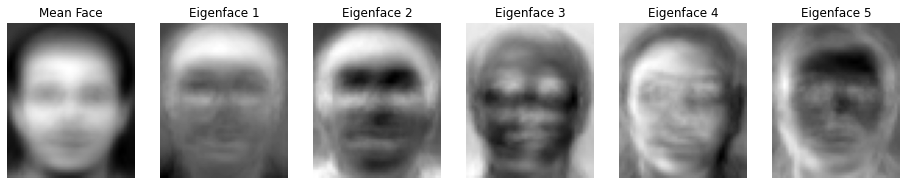

In [10]:
pca = PCA()
pca.fit(X_train.reshape(len(Y_train),-1))

plt.figure(figsize=(16,12))
plt.subplot(1,6,1)
plt.axis('off')
plt.title("Mean Face")
plt.imshow(pca.mean_.reshape(X_train[0].shape), cmap='gray')

for i in range(5):
  plt.subplot(1,6,i+2)
  plt.axis('off')
  plt.title("Eigenface {}".format(i+1))
  plt.imshow(pca.components_[i].reshape(X_train[0].shape), cmap='gray')
plt.show()

In [9]:
pca.components_.shape

(360, 2576)

## 2. Reconstruct person2 image1 using the first n = 3, 50, 170, 240, 345 eigenfaces
## 3. compute the mean squared error

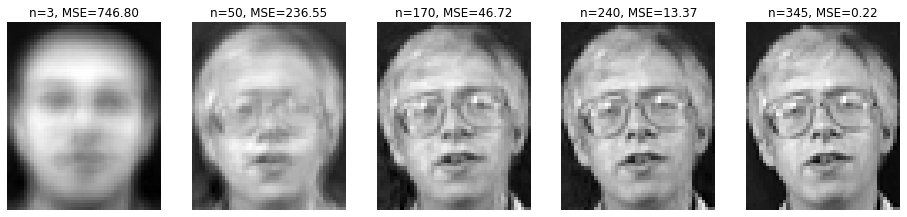

In [14]:
img = cv2.imread('data/2_1.png', cv2.IMREAD_GRAYSCALE).reshape(1,-1)
a = pca.transform(img)

plt.figure(figsize=(16,12))
n_components = [3, 50, 170, 240, 345]

for i,n in enumerate(n_components):
  face = np.zeros(img.shape) #create a black image with same size
  for j in range(n):
    face = face + a[0][j]*pca.components_[j]
  face = face + pca.mean_
  MSE = np.mean((face-img)**2)
  plt.subplot(1,5,i+1)
  plt.axis('off')
  plt.title('n={}, MSE={:.2f}'.format(n,MSE))
  plt.imshow(face.reshape(X_train[0].shape), cmap = 'gray')
  

## 4. cross-validation results

In [16]:
a = np.random.permutation(np.arange(10))
a

array([7, 2, 4, 0, 6, 5, 8, 9, 1, 3])

In [18]:
reduced_X_train = pca.transform(X_train.reshape(len(Y_train),-1))
K = [1, 3, 5]
N = [3, 50, 170]

random = np.random.permutation(len(Y_train))
reduced_X_train = reduced_X_train[random]
Y_train_random = Y_train[random]

for k in K:
  print('k={}'.format(k))
  knn = KNeighborsClassifier(n_neighbors=k)
  for n in N:
    print('   n={}'.format(n), end = '')
    score = cross_val_score(knn,reduced_X_train[:, :n], Y_train_random, cv =3)
    print('score = {:.4f}'.format(score.mean()))

k=1
   n=3score = 0.7306
   n=50score = 0.9667
   n=170score = 0.9556
k=3
   n=3score = 0.6944
   n=50score = 0.9222
   n=170score = 0.9167
k=5
   n=3score = 0.6278
   n=50score = 0.8861
   n=170score = 0.8667


## 5. recognition rate of the testing set

In [20]:
k=1
n=50

reduced_X_test = pca.transform(X_test.reshape(len(Y_test),-1))
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(reduced_X_train[:, :n], Y_train_random)

print('Accuracy = {}'.format(knn.score(reduced_X_test[:, :n], Y_test)))

Accuracy = 0.925
